In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tqdm
import re
import librosa
from imblearn.combine import *
from sklearn import preprocessing
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn import svm
from sklearn import linear_model
import scipy
import pywt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决无法显示符号的问题
palette = 'deep'
sns.set(font='SimHei', font_scale=1.2, palette=palette)  # 解决Seaborn中文显示问题

In [48]:
df = pd.read_excel('../3rd天府杯A提/附件10.xls')
df

,样本,库深/m,库容,断层类型,构造活动/基本烈度,岩性,震级
0,1,53.0,0.04,正断,1.0,沉积岩,1.0
1,2,68.0,1.70,正断,1.0,变质岩,1.0
2,3,106.0,3.40,正断,1.0,变质岩,1.0
3,4,85.0,4.00,正断,1.0,沉积岩,1.0
4,5,136.0,4.60,正断,1.0,变质岩,1.0
...,...,...,...,...,...,...,...
97,98,122.0,177.50,走滑,7.7,沉积岩,5.9
98,99,97.0,115.00,逆断,8.0,岩浆岩,6.1
99,100,122.0,1750.00,逆断,8.0,岩浆岩,6.1
100,101,120.0,47.50,走滑,8.3,沉积岩,6.3


In [49]:
df.columns

Index(['样本', '库深/m', '库容', '断层类型', '构造活动/基本烈度', '岩性', '震级'], dtype='object')

In [50]:
encoders = {i: preprocessing.LabelEncoder() for i in df.columns}
for i in ['断层类型', '岩性']:
    df[i] = encoders[i].fit_transform(df[i])

df

,样本,库深/m,库容,断层类型,构造活动/基本烈度,岩性,震级
0,1,53.0,0.04,0,1.0,3,1.0
1,2,68.0,1.70,0,1.0,0,1.0
2,3,106.0,3.40,0,1.0,0,1.0
3,4,85.0,4.00,0,1.0,3,1.0
4,5,136.0,4.60,0,1.0,0,1.0
...,...,...,...,...,...,...,...
97,98,122.0,177.50,1,7.7,3,5.9
98,99,97.0,115.00,2,8.0,2,6.1
99,100,122.0,1750.00,2,8.0,2,6.1
100,101,120.0,47.50,1,8.3,3,6.3


In [51]:
X, y = df.iloc[:, 1:-1], df['震级']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,
                                                    shuffle=True)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('r2_score', r2_score(y_test, y_pred))

r2_score 0.9858758917180976


In [65]:
corr_matrix, p = scipy.stats.spearmanr(df.iloc[:, 1:])

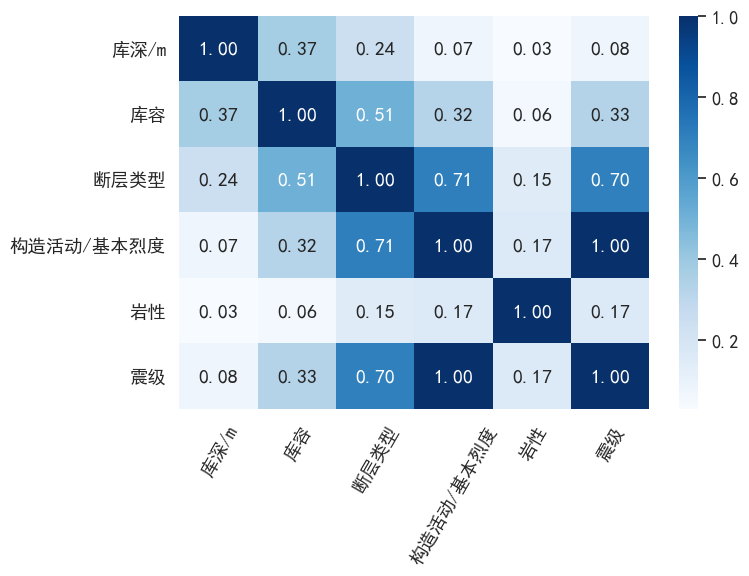

In [85]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='Blues', annot=True, fmt='.2f', xticklabels=df.columns[1:], yticklabels=df.columns[1:])
plt.xticks(rotation=60)
plt.tight_layout()
plt.savefig('spearman相关系数.svg')
plt.show()